<a href="https://colab.research.google.com/github/vrishi220/MachineLearning/blob/master/MLhw1prob4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.9088 - acc: 0.7910 - val_loss: 0.5500 - val_acc: 0.8716
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.5137 - acc: 0.8709 - val_loss: 0.4453 - val_acc: 0.8856
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.4453 - acc: 0.8820 - val_loss: 0.4020 - val_acc: 0.8938
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.4115 - acc: 0.8895 - val_loss: 0.3778 - val_acc: 0.8992
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.3905 - acc: 0.8938 - val_loss: 0.3611 - val_acc: 0.9033
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.3757 - acc: 0.8971 - val_loss: 0.3498 - val_acc: 0.9053
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.3645 - acc: 0.8998 - val_loss: 0.3413 - val_acc: 0.9075
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 0.

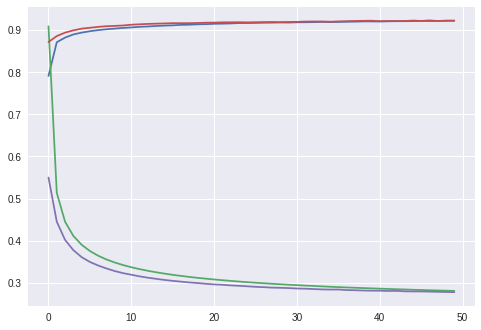

In [9]:
from keras.datasets import mnist
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()
output_size, classes_size, num_epoch, batch_size, input_size  = 10, 10, 50, 50, 28**2
X_train, X_test = X_train.reshape(X_train.shape[0], input_size).astype('float32')/255, X_test.reshape(X_test.shape[0], input_size).astype('float32')/255
Y_train, Y_test = np_utils.to_categorical(y_train, classes_size), np_utils.to_categorical(y_test, classes_size)
model = Sequential()
model.add(Dense(output_size, input_dim = input_size, activation = 'softmax'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
fit_history = {'acc':[],'loss':[],'val_acc':[],'val_loss':[]}
for i in range(num_epoch):
  his = model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch = 1, verbose = 2, validation_data = (X_test, Y_test))
  fit_history['acc'].append(his.history['acc'])
  fit_history['loss'].append(his.history['loss'])
  fit_history['val_acc'].append(his.history['val_acc'])
  fit_history['val_loss'].append(his.history['val_loss'])
print('Accuracy: {}%'.format(model.evaluate(X_test, Y_test, verbose = 2)[1]*100))
print(fit_history['acc'])
print(fit_history['loss'])
print(fit_history['val_acc'])
print(fit_history['val_loss'])
plt.plot(fit_history['acc'])
plt.plot(fit_history['loss'])
plt.plot(fit_history['val_acc'])
plt.plot(fit_history['val_loss'])